## Relax and hold steady

***Le but de ce notebook est d'implémenter le flux de Stokes dans une cavité carrée, en résolvant une équation biharmonique.***

Le flux de Stokes est très pratique, car il permet de simplifier l'équation de Navier-Stokes en éliminant la non-linéarité. Après un changement d'échelle, l'équation de Navier-Stokes s'écrit:

\begin{equation}
Re \left(\frac{\partial u^*}{\partial t} + u^* \cdot \nabla u^* \right) = -\nabla p^* + \nabla^2 u^*
\end{equation}
 Dans le flux de Stokes, on suppose que le nombre de Reynolds tend vers zero, ce qui va simplifier cette équation. Prenons le rotationnel après simplification:
 
\begin{equation}
\nabla \times 0 = \nabla \times \left( - \nabla p + \nabla^2 u\right)
\end{equation}

Or $p$ étant un scalaire, le premier terme de droite s'annule et on obtient:

\begin{equation}
\nabla ^2 \omega = 0
\end{equation}

où $\nabla \times u = \omega$ est la vorticité.  

Regardons ce qu'il en est de l'écoulement en deux dimensions, où une des vitesse est nulle. Pour un écoulement incompressible on peut définir la fonction de flot $\psi$ comme:

\begin{equation}
u = \frac{\partial \psi}{\partial y} \quad \text{et} \quad v = - \frac{\partial \psi}{\partial x}
\end{equation}

et

\begin{equation}
\omega = \frac{\partial v}{\partial x} - \frac{\partial u}{\partial y}
\end{equation}
 
Finalement en combinant les trois équations, on obtient: 

\begin{equation}
\nabla^4 \psi= 0
\end{equation}
 

Il nous font donc discrétiser cette équation, pour cela nous allons faire une discrétisation centrale finie, appliquée à l'expression suivante 
*(source: Wikipedia https://fr.wikipedia.org/wiki/%C3%89quation_biharmonique)*

$$\nabla ^4 \psi = \frac{\partial^4 \psi}{\partial x^4}+\frac{\partial^4 \psi}{\partial y^4}+2\frac{\partial^4 \psi}{\partial x^2 \partial y^2}=0$$ 


\begin{array}{rcccl}
\frac{\partial^2\frac{\partial^2 \psi}{\partial x^2}}{\partial x^2}& \Rightarrow &\frac{\left(\frac{\partial^2 \psi}{\partial x^2} \right)_{i+1,j}-2\left(\frac{\partial^2 \psi}{\partial x^2} \right)_{i,j}+\left(\frac{\partial^2 \psi}{\partial x^2} \right)_{i-1,j}}{\Delta x^2}&=&\frac{\left(\psi_{i+1,j}-2\psi_{i,j}+\psi_{i-1,j} \right)_{i+1,j}-2\left(\psi_{i+1,j}-2\psi_{i,j}+\psi_{i-1,j} \right)_{i,j}+\left(\psi_{i+1,j}-2\psi_{i,j}+\psi_{i-1,j} \right)_{i-1,j}}{\Delta x^4}\\
& & &=&\frac{\psi_{i+2,j}-2\psi_{i+1,j}+\psi_{i,j}-2(\psi_{i+1,j}-2\psi_{i,j}+\psi_{i-1,j})+\psi_{i,j}-2\psi_{i-1,j}+\psi_{i-2,j}}{\Delta x^4}
\end{array}

En procédans de même pour les deux autres termes et en considérant que $\Delta x= \Delta y$, on obtient finalement:

$$\nabla⁴ \psi = 20\psi_{i,j}^k - 8(\psi_{i+1,j}^k+\psi_{i,j+1}^k+\psi_{i-1,j}^k+\psi_{i,j-1}^k)+2(\psi_{i+1,j-1}^k+\psi_{i-1,j+1}+\psi_{i+1,j+1}^k+\psi_{i-1,j-1}^k)+(\psi_{i+2,j}^k+\psi_{i,j+2}^k+\psi_{i-2,j}^k+\psi_{i,j-2}^k)$$

### Lid-driven cavity flow

Nous allons en particulier nous intéresser au problème du *lid-driven cavity flow*, où notre carré $(nx \times ny)$ possède un couvercle qui va se déplacer à vitesse constante $u = 1$. Et où il n'y a aucun fluide qui peut sortir. Nous allons aussi supposer que toutes les surfaces, le couvercle compris, possèdent des conditions aux bords dites "no-slip border conditions".

Jetons un coup d'oeil aux conditions aux bords:

<img src="./figures/drivencavity.svg" width=400px>

**Conditions aux bords**

Tout d'abord nous avons des conditions de Dirichlet $\psi = 0$ sur les bords. Ceci est plutôt intuitif, étant donné qu'il n'y a pas de fluide en dehors de la boîte et les bords même ne sont pas un fluide non plus.

En plus de cela nous avons des conditions de Neumann dont il va falloir tenir compte. Pour les trois bords fixes, la vélocité selon les composantes $u$ et $v$ est nulle, justement car ses bords ne se mouvoient pas. Par contre pour le couvercle se déplaçant avec une vitesse constante $u=1$ on aura la condition $\frac{\partial \psi}{\partial y}=1$.

En fonction du bord sur lequel nous nous trouvons, nous allons appliquer la méthode de *"forward ou backward, second order accurate finite differences"*, en n'utilisant que des points de la bordure intérieure.

Regardons en détails le bord où $x=0$ et appliquons un raisonnement analogue pour les autres bords:

1. En $x=0$ on aura $\frac{\partial \psi}{\partial x}=0$
Comme on ne connait que $\psi$ à l'intérieur du carré, on va utiliser discretisation *"forward"* du deuxième ordre. On a utilisé les coefficients donnés sur la page *https://en.wikipedia.org/wiki/Finite_difference_coefficient*:

$$\frac{-3/2 \psi_{i,j}+2\psi_{i+1,j}-1/2\psi_{i+2,j}}{\Delta x}=0$$
Or on sait aussi que $\psi$ s'annule sur le bord et donc $\psi_{i,j}=0$. $\Rightarrow \psi_{1,j}=1/4 \psi_{2,j}$ 

2. En $x=l$ on aura aussi $\frac{\partial \psi}{\partial x}=0$ et on devra utiliser la discrétisation *"backwards"*:
$$\psi_{l-1,j}=1/4\psi_{l-2,j}$$

3. En $y=0$ on aura $\frac{\partial \psi}{\partial y}=0$ et on va utiliser la discrétisation *"forward"*:

$$\psi_{i,+1}=1/4\psi_{i,+2}$$

4. En y=l on aura $\frac{\partial \psi}{\partial y}=1$, ici on utilisera la discrétisation *"backwards"*:
$$\frac{3/2 \psi_{i,j}-2\psi_{i-1,j}+1/2\psi_{i-2,j}}{\Delta y}=1 \Leftrightarrow \psi_{i,l-1}=1/2(1/2\psi_{i,l-2}-\Delta y)$$

Il ne reste plus qu'à implémenter le tout et puis nous serons prêt à résoudre l'équation biharmonique.

Pour la résolution de se problème nous allons utiliser la méthode du gradient conjugué décrit dans le *numerical mooc master 5.4*.

Rappelons brièvement le fonctionnement de cette méthode. (Remarque: afin de faciliter la notation on dénotera psi simplement par p.)
On va stocker toutes nos valeurs de $\psi_{i,j}$ en tous les points dans un vecteur $\mathbf{p}$ de $N = nx*ny$ valeurs, et on prend une matrice A $N \times N$ qui comprend nos coefficient devant $\mathbf{p}$: $\quad A\mathbf{p} = 0$

On va partir d'une première estimation $\mathbf{p}^0$, que nous allons ensuite modifier de sorte à s'approcher de plus en plus de la solution. Pour cela on va modifier notre vecteur $\mathbf{p}$ en ajoutant un autre vecteur:
\begin{equation}
{\bf p}^{k+1}={\bf p}^k + \alpha {\bf d}^k
\end{equation}

En choisissant bien la direction donnée par $\mathbf{d}^k$ nous allons pouvoir converger plus rapidement vers notre solution. Pour cela nous allons utiliser le résidu.

Nous savons qu'il existe une erreur entre la valeur de $p_i^k$ calculé et de la valeur exacte. En tenant compte de cette erreur, on aura: 
\begin{equation}
{\bf r^k} + A \bf p^k = 0
\end{equation}

Il s'agit maintenant de faire tendre ce résidu le plus rapidement possible vers zéro. On commence par 

$$\mathbf{r}^0=-A \mathbf{p}^0$$

La méthode des gradients conjugués consiste à réduire le nombre de pas pris afin d'arriver plus rapidement à la solution, par rapport à la méthode de "steepest descent" également évoquée dans les modules . Pour cela l'algorithme ne va jamais prendre une même direction deux fois de suite. Nous allons alors prendre des pas de taille 

$$\alpha = \frac{\mathbf{r}^k \mathbf{r}^k}{A \mathbf{d}^k \mathbf{d}^k}$$

et de direction 

$$\mathbf{d}^{k+1} = \mathbf{r}^{k+1}+\beta \mathbf{d}^k$$

avec $\beta = \frac{\mathbf{r}^{k+1}\mathbf{r}^{k+1}}{\mathbf{r}^k\mathbf{r}^k}$

Notre $\mathbf{p}$ va alors varier comme: $\mathbf{p}^{k+1} = \mathbf{p}^k + \alpha \mathbf{d}^k$

$\mathbf{p}$ et $\mathbf{k}$ étant directement lié, nous devrons appliquer nos conditions aux bords aux deux.

In [1]:
import numpy as np
from matplotlib import pyplot
%matplotlib inline
from matplotlib import rcParams, cm
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16


Définissons nos paramètres de base comme indiqué dans les consignes, ainsi que les conditions aux bords.

En effet il faut implémenter les conditions une première fois en dehors de la boucle d'itération, afin de fixer $\mathbf{d}^0= \mathbf{r}^0$.

In [2]:
nx = 41   #nombre de points dans notre grille
ny = 41
L = 1   #largeur de la cavité 
H = 1   #hauteur de la cavité 

dx = L/(nx-1)
dy = H/(ny-1)

#permettra dans la suite de déterminer la durée d'itération
l1_norm = 1
l1_target = 1e-8

#condition de Dirichlet
#nous commençons avec une cavité sans flux, cela permet aussi de ne pas avoir à initialiser les conditions de Dirichlet
p_i = np.zeros((ny,nx))

#donne la coordonnée en x et y de chaque point de notre grille
x = np.linspace(0,L,nx) 
y = np.linspace(0,H,ny) 

#initialisation des conditions aux bords de Neumann
p_i[0,:]=p_i[:,0]=p_i[-1,:]=p_i[:,-1]=0 
p_i[-2,2:-2] = 1/2*(1/2*p_i[-3,2:-2]-dy)   #en y = L
p_i[1,2:-2] = 1/4*p_i[2,2:-2]              #en y = 0
p_i[1:-1,1] = 1/4*p_i[1:-1,2]              #en x = 0 
p_i[1:-1,-2] = 1/4*p_i[1:-1,-3]            #en x = L

**Remarque sur les conditions aux bords:** Etant donné que nous voulons rester à l'intérieur du carrée, on va devoir regarder nos conditions aux bords depuis un contour décalé de deux points de la grille (un à chaque extrémité) vers l'intérieur. Ceci explique par exemple le fait qu'on a pris [1:-1,1] pour $x=0$, on commence en x,y = 1 et on parcourt toutes les valeurs de y sauf la dernière. On procède de la même manière pour le bord opposé (x=L). Par contre pour les deux bords restant, on va parcourir l'axe des x sur [2:-2], car on ne veut pas compter deux fois les coins. 

Au lieu d'utiliser la fonction L2_error du cours, nous allons utiliser la fonction donnée dans les consignes, afin de calculer la norme L1 entre nos anciennes et nouvelles valeurs de $\psi$. Cette fonction va nous permettre de calculer la convergence de notre algorithme.

$$L_{1norm} = \sum_{k=0}^{N} |p_k -p|$$

In [3]:
def L1norm(new, old):
    norm = np.sum(np.abs(new-old))
    return norm

Appliquons maintenant la méthode du gradient conjugué.

Les différentes étapes sont les suivantes, on applique une seule fois $\mathbf{d}^0= \mathbf{r}^0$, puis on fait:

1. Calculer $\alpha = \frac{{\bf r}^k \cdot {\bf r}^k}{A{\bf d}^k \cdot {\bf d}^k}$
2. Calculer ${\bf p}^{k+1}$
3. Calculer ${\bf r}^{k+1} = {\bf r}^k - \alpha A {\bf d}^k$ 
4. Calculer $\beta = \frac{{\bf r}^{k+1} \cdot {\bf r}^{k+1}}{{\bf r}^k \cdot {\bf r}^k}$
5. Calculer ${\bf d}^{k+1}={\bf r}^{k+1}+\beta{\bf d}^{k}$
6. Répéter!

In [4]:
def conjugate_gradient_biharm(p, dx, dy, l2_target):
    '''Résolution via la méthode du gradient conjugué de notre équation biharmonique pour
    une boîte fermé avec un couvercle étanche qui se dépolace à vitesse constante u=1
    
    Admet les conditions aux bords de  Dirichlet p=0, ainsi que les conditions de Neumann
    
    Parameters:
    ----------
    p : Matrice 2D de "floats"
        Matrice initiale
    dx: "float"
        Discretisation selon x
    dy: "float"
        Discretisation selon y
    l2_target: "float"
        Critère de fin de l'itération
        
    Returns:
    -------
    p: Matrice 2D de "float"
        Solution du problème biharmonique
    '''
    ny, nx = p.shape       #on s'assure que notre grille a bien les dimensions voulues
    r  = np.zeros((ny,nx)) # initialsiation des residus 
    Ad  = np.zeros((ny,nx)) # initialisation de la matrice résultante de Axd
    
    l1_norm = 1              
    iterations = 0
    l2_conv = []
    
    # première étape: on implémente les résidus initiaux 
    # ainsi, la première direction de recheche est ce résidu
    r[2:-2,2:-2]= (1/dx**4)*(-20 *p[2:-2,2:-2]+ (8*(p[2:-2,3:-1] + p[3:-1,2:-2] + p[2:-2,1:-3]+ p[1:-3, 2:-2])\
                          -2*(p[1:-3,3:-1]+p[3:-1,1:-3]+p[3:-1,3:-1]+p[1:-3,1:-3])\
                          -(p[2:-2,4:]+p[4:,2:-2]+p[2:-2,:-4]+p[:-4,2:-2])))
    

    d = r.copy()    #d0=r0 
    
    #calcul du numérateur de alpha 
    rho = np.sum(r*r)  
    
    #Conditions de Dirichlet pour d
    d[0,:]=d[:,0]=d[-1,:]=d[:,-1]=0 
        
    #Conditions de Neumann pour d
    d[-2,2:-2]=1/2*(1/2*d[-3,2:-2]-dy)     #en y = L
    d[1,2:-2]= 1/4*d[2,2:-2]               #en y = 0
    d[1:-1,1] = 1/4*d[1:-1,2]              #en x = 0 
    d[1:-1,-2] = 1/4*d[1:-1,-3]            #en x = L
    
    #Calcul de A x d
    Ad[2:-2,2:-2]= -(1/dx**4)*(-20*d[2:-2,2:-2] + (8*(d[2:-2,3:-1] + d[3:-1,2:-2] + d[2:-2,1:-3]+ \
                        d[1:-3, 2:-2])+2*(-d[1:-3,3:-1]-d[3:-1,1:-3]-d[3:-1,3:-1]-\
                        d[1:-3,1:-3])+(-d[2:-2,4:]-d[4:,2:-2]-\
                        d[2:-2,:-4]-d[:-4,2:-2])))
    #Calcul du dénominateur de alpha
    sigma = np.sum(d*Ad)

    # Iterations pour une durée déterminée par l2_target
    while l1_norm > l2_target:
        
        #nous prenons une copie des matrices, afin de garder une version initiale inchangée
        pk = p.copy()     
        rk = r.copy()
        dk = d.copy()
        
        # 1) calcul de alpha
        alpha = rho/sigma
        
        #2) calcul de p^{k+1}
        p = pk + alpha*dk
        
        #3) calcul de r^{k+1}
        r = rk- alpha*Ad
        
        #Conditions aux bords sur p (doivent rester vérifier au cours des itérations)
        
        #Condition de Dirichlet
        p[0,:]=p[:,0]=p[-1,:]=p[:,-1]=0 
        
        #Condition de Neumann
        p[-2,2:-2]=1/2*(1/2*p[-3,2:-2]-dy)     #en y = L
        p[1,2:-2]= 1/4*p[2,2:-2]               #en y = 0
        p[1:-1,1] = 1/4*p[1:-1,2]              #en x = 0 
        p[1:-1,-2] = 1/4*p[1:-1,-3]            #en x = L
        
        rhop1 = np.sum(r*r)     #calcul du numérateur de beta
        
        #4) calcul de beta
        beta = rhop1 / rho
        rho = rhop1
        
        #5) calcul de d^{k+1}
        d = r + beta*dk
        
        #Conditions aux bords pour d
        #Condition de Dirichlet
        d[0,:]=d[:,0]=d[-1,:]=d[:,-1]=0 
        
        #Condotion de Neumann
        d[-2,2:-2]=1/2*(1/2*d[-3,2:-2]-dy)     #en y = L
        d[1,2:-2]= 1/4*d[2,2:-2]               #en y = 0
        d[1:-1,1] = 1/4*d[1:-1,2]              #en x = 0 
        d[1:-1,-2] = 1/4*d[1:-1,-3]            #en x = L
        
        #Calcul de notre nouveau A x d, afin de répéter toutes ces étapes
        Ad[2:-2,2:-2]= -(1/dx**4)*(-20*d[2:-2,2:-2] + (8*(d[2:-2,3:-1] + d[3:-1,2:-2] + d[2:-2,1:-3]+ \
                        d[1:-3, 2:-2])+2*(-d[1:-3,3:-1]-d[3:-1,1:-3]-d[3:-1,3:-1]-\
                        d[1:-3,1:-3])+(-d[2:-2,4:]-d[4:,2:-2]-\
                        d[2:-2,:-4]-d[:-4,2:-2])))

        sigma = np.sum(d*Ad)
        
        #Calcul pour la convergence et pour définir la fin des itérations
        l1_norm = L1norm(pk,p)
        iterations += 1   #permet d'avoir le nombre d'itération 
        l2_conv.append(l1_norm)
    
    print('Nombre d itération pour la méthode du gradient conjugué: {0:d}'.format(iterations))
    return p, l2_conv     


Evaluons notre fonction pour voir le nombre d'itération necéssaire:

In [5]:
p, l1_conv = conjugate_gradient_biharm(p_i.copy(), dx, dy, l1_target)

Nombre d itération pour la méthode du gradient conjugué: 46191


On remarque que cette méthode necéssite quand même beaucoup d'itérations, mais cela n'est pas surprenant étant donné que l'équation biharmonique n'est pas une petite équation facile à résoudre. 

Regardons maintenant ce que donne le graphique de notre flux final:

Text(0.5,1,'Contour de l équation biharmonique')

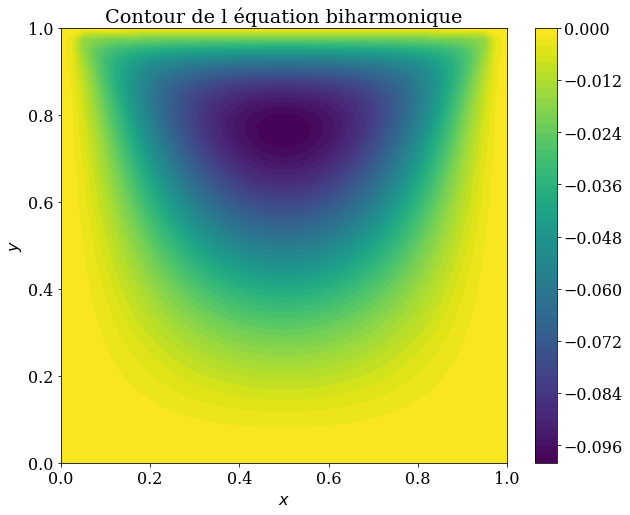

In [6]:
pyplot.figure(figsize=(10,8))
pyplot.contourf(x,y,p,50,cmap=cm.viridis)
pyplot.xlabel('$x$')
pyplot.ylabel('$y$')
pyplot.colorbar();
pyplot.title('Contour de l équation biharmonique')

Nous retrouvons bien le contour attendu. On a apparition d'un vortex au niveau du couvercle bougeant.

Finalement regardons quelles sont les valeurs de notre fonction aux points suivant (x,y): (0.6,0.2), (0.6,0.4), (0.6,0.6), (0.6,0.8).
Pour cela il nous faut calculer les indices spatiaux.

In [7]:
#nx = ny et L = H

def ind_x(x,L,nx):
    return int((x*nx)/L)

#or y et x sont symétrique, regardons donc ce que vaut l'indice en 0.2,0.4,0.6 et 0.8
print(ind_x(0.2,L,nx),ind_x(0.4,L,nx),ind_x(0.6,L,nx),ind_x(0.8,L,nx))

8 16 24 32


1) en (x,y) = (0.6,0.2)

In [8]:
print(p[8,24])

-0.010032064283918415


2) en (x,y) = (0.6,0.4)

In [9]:
print(p[16,24])

-0.03614755534890854


3) en (x,y) = (0.6,0.6)

In [10]:
print(p[24,24])

-0.07381974805715137


4) en (x,y) = (0.6,0.8)

In [11]:
print(p[32,24])

-0.09451468243573317


Pour finir regardons à quoi ressemble notre convergence. Pour la méthode du gradient conjugué nous nous attendons normalement à avoir une forte convergence au début, soit une pente très raide et puis cette pente va se stabiliser. On aura atteint alors la limite de la méthode du gradient conjugué.

Text(0.5,1,'Convergence de l équation biharmonique')

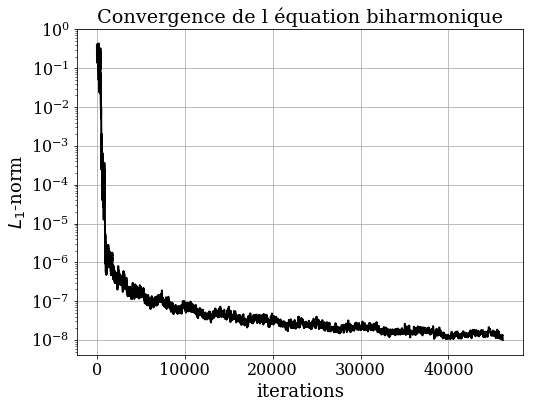

In [12]:
pyplot.figure(figsize=(8,6))
pyplot.grid(True)
pyplot.xlabel(r'iterations', fontsize=18)
pyplot.ylabel(r'$L_1$-norm', fontsize=18)
pyplot.semilogy(np.arange(len(l1_conv)), l1_conv, lw=2, color='k');
pyplot.title('Convergence de l équation biharmonique' )

Nous obtenons bel et bien ce à quoi on s'attendait.

**Conclusion**

Pour conclure nous avons réussi à résoudre l'équation biharmonique en utilisant la méthode du gradient conjugué et même si le nombre d'itération est plus élevé que lors de la résolution de l'équation de poisson par exemple, cela est probablement dû à la difficulté de résolution de l'équation. On voit toutefois sur le graphique précédant que cette méthode permet d'atteindre plutôt rapidement une relativement petite L1_norm, ce qui permet de se convaincre que l'utilisation de cette méthode est tout à fait justifiée, justement à cause de la fameuse réduction du nombre de pas pris pour converger à une solution par rapport à d'autres méthodes. 